<a href="https://colab.research.google.com/github/WANGDAKEKE/pytorch-retinanet/blob/master/0319pipeline_textpart%2Bimagepart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 安装相关的库

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


embedding部分

In [ ]:
!pip install -U FlagEmbedding


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━ 357.6/731.7 MB 938.6 kB/s eta 0:06:39

llm（openai）部分

In [ ]:
! pip install openai
! pip install llama_index
! pip install langchain

from openai import OpenAI
import openai


# 示例代码

BGEM3FlagModel

In [ ]:
# from FlagEmbedding import BGEM3FlagModel

# model = BGEM3FlagModel('BAAI/bge-m3',
#                        use_fp16=True) # Setting use_fp16 to True speeds up computation with a slight performance degradation

# sentences_1 = ["What is BGE M3?", "Defination of BM25"]
# sentences_2 = ["BGE M3 is an embedding model supporting dense retrieval, lexical matching and multi-vector interaction.",
#                "BM25 is a bag-of-words retrieval function that ranks a set of documents based on the query terms appearing in each document"]

# embeddings_1 = model.encode(sentences_1,
#                             batch_size=12,
#                             max_length=8192, # If you don't need such a long length, you can set a smaller value to speed up the encoding process.
#                             )['dense_vecs']
# embeddings_2 = model.encode(sentences_2)['dense_vecs']
# similarity = embeddings_1 @ embeddings_2.T
# print(similarity)
# # [[0.6265, 0.3477], [0.3499, 0.678 ]]


openaikey

In [ ]:
# ! pip install openai
# # ! pip install llama_index
# # ! pip install langchain

# from llama_index.multi_modal_llms.openai import OpenAIMultiModal
# from langchain.chat_models import ChatOpenAI
# from google.colab import userdata
# from openai import OpenAI
# import openai
# import llama_index

# api_key = "sk-Tqe6RfYJRWnpxYa76aE043F1Ab5e4eB080DdEcD4102bD339"  # 填入您的 APIKEY
# base_url = "https://xy.eveai.top/v1"  # 使用您的特定 API 端点

# openai_mm_llm = OpenAIMultiModal(
#     model="gpt-4-vision-preview",
#     max_new_tokens=1500,
#     api_key=api_key,
#     api_base=base_url,
# )

# client = OpenAI(
#     api_key=api_key,
#     base_url=base_url
# )


# 数据库构建

In [ ]:
from FlagEmbedding import BGEM3FlagModel
import json


In [ ]:
# 初始化模型
model = BGEM3FlagModel('BAAI/bge-m3', use_fp16=True)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 23 files:   0%|          | 0/23 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/15.5k [00:00<?, ?B/s]

imgs/bm25.jpg:   0%|          | 0.00/69.0k [00:00<?, ?B/s]

colbert_linear.pt:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

imgs/.DS_Store:   0%|          | 0.00/6.15k [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

imgs/long.jpg:   0%|          | 0.00/485k [00:00<?, ?B/s]

imgs/miracl.jpg:   0%|          | 0.00/448k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

long.jpg:   0%|          | 0.00/127k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

imgs/mkqa.jpg:   0%|          | 0.00/608k [00:00<?, ?B/s]

imgs/others.webp:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

imgs/nqa.jpg:   0%|          | 0.00/158k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.31k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

sparse_linear.pt:   0%|          | 0.00/3.52k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

In [ ]:
# 向量构建检查
# # 定义查询文本
# query_text = ["architecture design"]

# # 嵌入查询文本
# query_embedding = model.encode(query_text)['dense_vecs']
# print(query_embedding)

In [ ]:
import numpy as np
from tqdm import tqdm

model = BGEM3FlagModel('BAAI/bge-m3', use_fp16=True)

# 路径到你的JSON文件
json_file_path = '/content/drive/MyDrive/0319json/new_json_file.json'  # 请替换为你的文件路径
print("json loaded")

# 加载你的JSON文本库
with open(json_file_path, 'r', encoding='utf-8') as file:
    json_text_library = json.load(file)

np.save('/content/drive/MyDrive/0319json/embeddings_test.npy', np.array(library_embeddings))

# 从这里开始，你可以继续处理json_text_library，如嵌入文本库中的文本等
# 例如：
library_embeddings = []  # 初始化嵌入向量列表
image_urls = []  # 初始化图片URL列表



for item in tqdm(json_text_library, desc="Generating embeddings"):
    # 直接从每个字典中获取文本
    content_text = item['text']
    # 假设model.encode返回的是适当的嵌入向量
    embedding = model.encode([content_text])['dense_vecs']
    library_embeddings.append(embedding)

    # 直接从每个字典中获取图片URL
    image_urls.append(item['img'])

# # 计算相似度并排序
# similarity_scores = [query_embedding @ lib_emb.T for lib_emb in library_embeddings]
# sorted_indices = sorted(range(len(similarity_scores)), key=lambda i: similarity_scores[i], reverse=True)

# # 检索最相似的条目
# n_results = 2  # 你想要检索的结果数量
# top_results = [json_text_library[i] for i in sorted_indices[:n_results]]

# print(top_results)

json loaded


Generating embeddings: 100%|██████████| 452/452 [05:51<00:00,  1.29it/s]

[{'text': '▼建筑模型，model', 'img': 'http://labang-img.oss-cn-shenzhen.aliyuncs.com/OxC8wd6m.jpg'}, {'text': '▼建筑模型，model', 'img': 'http://labang-img.oss-cn-shenzhen.aliyuncs.com/KrY1gSPt.jpg'}]


In [ ]:
# 加载嵌入向量,并进行检索
embeddings = np.load('/content/drive/MyDrive/0319json/embeddings_test.npy')

# 定义查询文本
query_text = ["architecture design "]

# 嵌入查询文本
query_embedding = model.encode(query_text)['dense_vecs']
print(query_embedding)



# 计算相似度并排序
similarity_scores = [query_embedding @ lib_emb.T for lib_emb in library_embeddings]
sorted_indices = sorted(range(len(similarity_scores)), key=lambda i: similarity_scores[i], reverse=True)

# 检索最相似的条目
n_results = 20  # 你想要检索的结果数量
top_results = [json_text_library[i] for i in sorted_indices[:n_results]]

for result in top_results:
    print(result)


[[-0.04799727  0.02593172 -0.0067488  ...  0.02361452  0.00833595
   0.0336606 ]]
{'text': '▼建筑模型，model', 'img': 'http://labang-img.oss-cn-shenzhen.aliyuncs.com/OxC8wd6m.jpg'}
{'text': '▼建筑模型，model', 'img': 'http://labang-img.oss-cn-shenzhen.aliyuncs.com/KrY1gSPt.jpg'}
{'text': '▼建筑模型，model', 'img': 'http://labang-img.oss-cn-shenzhen.aliyuncs.com/KrY1gSPt.jpg'}
{'text': '▼建筑模型，model', 'img': 'http://labang-img.oss-cn-shenzhen.aliyuncs.com/esjQKVFi.jpg'}
{'text': '▼建筑模型，model', 'img': 'http://labang-img.oss-cn-shenzhen.aliyuncs.com/esjQKVFi.jpg'}
{'text': '▼建筑模型，model', 'img': 'http://labang-img.oss-cn-shenzhen.aliyuncs.com/R0J5xT90.jpg'}
{'text': '▼建筑模型，model', 'img': 'http://labang-img.oss-cn-shenzhen.aliyuncs.com/R0J5xT90.jpg'}
{'text': '▼建筑模型，model', 'img': 'http://labang-img.oss-cn-shenzhen.aliyuncs.com/3kREsvpb.jpg'}
{'text': '设计单位：MDA Architecture', 'img': 'http://labang-img.oss-cn-shenzhen.aliyuncs.com/RlJM71EF.jpg'}
{'text': '设计单位：Nordest Architecture', 'img': 'http://labang-im

In [ ]:
import numpy as np
embeddings = np.load('/content/drive/MyDrive/0319json/embeddings_test.npy')

# 定义查询文本
query_text = "A design with a historical and cultural imprint"

# 假设 model.encode 能够处理查询并返回嵌入向量
query_embedding = model.encode([query_text])['dense_vecs']

# 计算相似度并排序
similarity_scores = [query_embedding @ lib_emb.T for lib_emb in library_embeddings]
sorted_indices = sorted(range(len(similarity_scores)), key=lambda i: similarity_scores[i], reverse=True)


# 检索最相似的条目，确保不重复且每个结果至少包含20个单词
seen_texts = set()
top_results = []
for idx in sorted_indices:
    item = json_text_library[idx]  # 假设每个条目是一个字典，包含文本和图片信息
    result_text = item['text']
    result_img = item['img']
    word_count = len(result_text.split())

    if result_text not in seen_texts and word_count >= 20:
        seen_texts.add(result_text)
        top_results.append((result_text, result_img))

    if len(top_results) >= 10:  # 一旦收集到足够数量的结果，就停止
        break

# 打印结果及其对应的图片
for result_text, result_img in top_results:
    print(f"Text: {result_text}\nImage: {result_img}\n")

NameError: name 'library_embeddings' is not defined

In [ ]:
api_key = "sk-Tqe6RfYJRWnpxYa76aE043F1Ab5e4eB080DdEcD4102bD339"  # 填入您的 APIKEY
base_url = "https://xy.eveai.top/v1"  # 使用您的特定 API 端点

client = OpenAI(
    api_key=api_key,
    base_url=base_url
)

def generate_text(prompt):
    try:
        response = client.chat.completions.create(
          model="gpt-3.5-turbo",
          prompt=prompt,
          max_tokens=150,
          temperature=0.7,
          top_p=1,
          frequency_penalty=0,

        )
        # 返回生成的文本
        return response.choices[0].text.strip()
    except Exception as e:
        print(f"An error occurred: {e}")
        return ""

def retrieve_information(query_embedding, top_k=1):
    # 定义查询文本
    query_text = "A design with a historical and cultural imprint"

    # 假设 model.encode 能够处理查询并返回嵌入向量
    query_embedding = model.encode([query_text])['dense_vecs']

    # 计算相似度并排序
    similarity_scores = [query_embedding @ lib_emb.T for lib_emb in embeddings]
    sorted_indices = sorted(range(len(similarity_scores)), key=lambda i: similarity_scores[i], reverse=True)


    # 检索最相似的条目，确保不重复且每个结果至少包含20个单词
    seen_texts = set()
    top_results = []
    for idx in sorted_indices:
        item = json_text_library[idx]  # 假设每个条目是一个字典，包含文本和图片信息
        result_text = item['text']
        result_img = item['img']
        word_count = len(result_text.split())

        if result_text not in seen_texts and word_count >= 20:
            seen_texts.add(result_text)
            top_results.append((result_text, result_img))

        if len(top_results) >= 5:  # 一旦收集到足够数量的结果，就停止
            break

    # 打印结果及其对应的图片
    for result_text, result_img in top_results:
        print(f"Text: {result_text}\nImage: {result_img}\n")
    return top_results

def rat_algorithm(task_prompt, language_model, retrieve_info_func, n_steps):

    response = client.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=[
        {
          "role": "user",
          "content": [
            {"type": "text", "text": task_prompt },
          ],
        }
      ],
      max_tokens=300,
    )
    draft_answer = response.choices[0]
    print(f"Initial thought: {draft_answer}")

    n_steps = 5
    for i in range(1, n_steps):
        query = f"{task_prompt} {draft_answer}"
        print(f"Generated query for step {i}: {query}")

        retrieved_info = response.choices  # 确保这个函数调用是正确的
        print(f"Retrieved information for step {i}: {retrieved_info}")

        draft_answer = " ".join(map(str,[draft_answer, retrieved_info]))  # 累积添加检索到的信息
        print("Revised draft answer after step {}: {}".format(i, draft_answer))
    # values = ','.join(map(str, value_list))
    return draft_answer


# 假设我们有一个任务提示和预定的步骤数量
task_prompt = "How to do design with a historical and cultural imprint,i need design ideas of different levels"
n_steps = 5  # 假设我们有5个思考步骤

# 执行算法
final_answer = rat_algorithm(task_prompt, retrieve_information , generate_text, n_steps)
print(final_answer)


Initial thought: Choice(finish_reason='length', index=0, logprobs=None, message=ChatCompletionMessage(content="1. Incorporate traditional motifs: Incorporate traditional motifs and patterns in your design to give it a historical and cultural feel. For example, you can use traditional patterns from a particular culture's textiles, ceramics, or architecture.\n\n2. Use local materials: Use materials that are native to the region or culture you are designing for. This will add an authentic touch to your design.\n\n3. Study historical art and architecture: Study historical art and architecture of the culture you are designing for. It will give you insight into the design elements that are important to that culture.\n\n4. Use color symbolism: Different cultures attach different meanings to colors. Use colors that hold significance in the culture you are designing for.\n\n5. Incorporate traditional craft techniques: Incorporate traditional craft techniques like weaving, embroidery, or pottery

In [ ]:
api_key = "sk-Tqe6RfYJRWnpxYa76aE043F1Ab5e4eB080DdEcD4102bD339"  # 填入您的 APIKEY
base_url = "https://xy.eveai.top/v1"  # 使用您的特定 API 端点

client = OpenAI(
    api_key=api_key,
    base_url=base_url
)

def generate_text(prompt):
    try:
        response = client.chat.completions.create(
          model="gpt-3.5-turbo",
          prompt=prompt,
          max_tokens=150,
          temperature=0.7,
          top_p=1,
          frequency_penalty=0,

        )
        # 返回生成的文本
        return response.choices[0].text.strip()
    except Exception as e:
        print(f"An error occurred: {e}")
        return ""

def retrieve_information(query_embedding, top_k=1):
    # 定义查询文本
    query_text = "A design with a historical and cultural imprint"

    # 假设 model.encode 能够处理查询并返回嵌入向量
    query_embedding = model.encode([query_text])['dense_vecs']

    # 计算相似度并排序
    similarity_scores = [query_embedding @ lib_emb.T for lib_emb in embeddings]
    sorted_indices = sorted(range(len(similarity_scores)), key=lambda i: similarity_scores[i], reverse=True)


    # 检索最相似的条目，确保不重复且每个结果至少包含20个单词
    seen_texts = set()
    top_results = []
    for idx in sorted_indices:
        item = json_text_library[idx]  # 假设每个条目是一个字典，包含文本和图片信息
        result_text = item['text']
        result_img = item['img']
        word_count = len(result_text.split())

        if result_text not in seen_texts and word_count >= 20:
            seen_texts.add(result_text)
            top_results.append((result_text, result_img))

        if len(top_results) >= 5:  # 一旦收集到足够数量的结果，就停止
            break

    # 打印结果及其对应的图片
    for result_text, result_img in top_results:
        print(f"Text: {result_text}\nImage: {result_img}\n")
    return top_results

def rat_algorithm(task_prompt, language_model, retrieve_info_func, n_steps):

    response = client.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=[
        {
          "role": "user",
          "content": [
            {"type": "text", "text": task_prompt },
          ],
        }
      ],
      max_tokens=300,
    )
    draft_answer = response.choices[0]
    print(f"Initial thought: {draft_answer}")

    n_steps = 5
    for i in range(1, n_steps):
        query = f"{task_prompt} {draft_answer}"
        print(f"Generated query for step {i}: {query}")

        retrieved_info = response.choices  # 确保这个函数调用是正确的
        print(f"Retrieved information for step {i}: {retrieved_info}")

        draft_answer = " ".join(map(str,[draft_answer, retrieved_info]))  # 累积添加检索到的信息
        print("Revised draft answer after step {}: {}".format(i, draft_answer))
    # values = ','.join(map(str, value_list))
    return draft_answer


# 假设我们有一个任务提示和预定的步骤数量
task_prompt = "How to do design with a historical and cultural imprint,i need design ideas of different levels"
n_steps = 5  # 假设我们有5个思考步骤

# 执行算法
final_answer = rat_algorithm(task_prompt, retrieve_information , generate_text, n_steps)
print("**********final answer is:*********",final_answer)



Initial thought: Choice(finish_reason='length', index=0, logprobs=None, message=ChatCompletionMessage(content='1. Inspired by traditional textiles: Incorporate traditional patterns, colors, and techniques from different cultures into your design. For example, you could use handwoven fabrics, intricate embroidery, or block printing techniques to bring a historical and cultural touch to your design.\n\n2. Historical architecture: Take inspiration from historical buildings and monuments to create architectural elements in your design. This could include using arches, columns, and intricate carvings in your furniture or decor pieces.\n\n3. Cultural artifacts: Use cultural artifacts such as pottery, textiles, or jewelry as inspiration for your design. You could incorporate motifs, shapes, or colors from these artifacts into your design to create a sense of history and culture.\n\n4. Traditional crafts: Explore traditional crafts such as pottery, wood carving, or basket weaving from differen

# 接下来，final_answer进入llm产出prompt

In [ ]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": f"Please extract and summarize the design elements based on {query_text} and {final_answer}, and prepare a prompt for design scheme generation. the prompt should be within 77 words and contain words only"},
      ],
    }
  ],
  max_tokens=300,
)


print(response.choices[0])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Design elements:\n1. Inspired by traditional textiles\n2. Historical architecture\n3. Cultural artifacts\n4. Traditional crafts\n5. Historical events\n6. Cultural symbols\n7. Historical references\n\nPrompt: "Create a design scheme that incorporates traditional textiles, historical architecture, cultural artifacts, traditional crafts, historical events, cultural symbols, and historical references to create a rich and unique design with a strong historical and cultural imprint."', role='assistant', function_call=None, tool_calls=None))


In [ ]:
print(response.dict()["choices"][0]['message']['content'])

Design elements:
1. Inspired by traditional textiles
2. Historical architecture
3. Cultural artifacts
4. Traditional crafts
5. Historical events
6. Cultural symbols
7. Historical references

Prompt: "Create a design scheme that incorporates traditional textiles, historical architecture, cultural artifacts, traditional crafts, historical events, cultural symbols, and historical references to create a rich and unique design with a strong historical and cultural imprint."


# prompt + 参考图 + 场地基本条件===diffusion+controlnet （blipdiffusion）====最终的图

Text: The intention of this renovation work is to respect the old architectural spirit at the same time give it a new life and warm feeling with a modern touch.
Image: http://labang-img.oss-cn-shenzhen.aliyuncs.com/cS29M7PZ.jpg



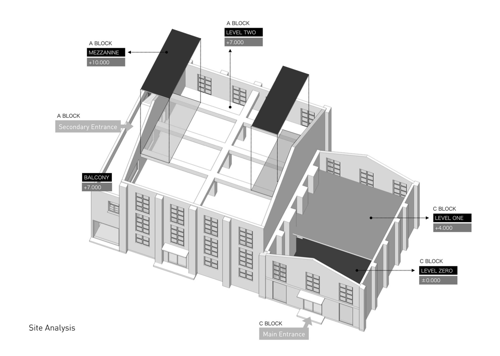

Text: Theproject site is located in the Mogan Mountain International Tourism Resort,which is a renowned scenic spot in the Yangtze river delta area. There arenatural bamboo forests and continuous hills. In order to fuse the pure natureof this kind of mountain, the design focuses on how the building fits in withthe environment --- in harmony with nature. Instead of abusing localism, weprefer to keep a low profile and listen carefully to the spontaneous dialoguebetween nature and architecture, meanwhile, respecting the natural combinationof construction and materials. The Architectural modeling of this projectabandons multifarious and flowery, but also does not want to presentsuperfluous cultural symbols. When a place becomes an emotional carriercarrying people, people and nature, only it will create empathy between people,architecture and nature as much as possible by focusing on the site itself andnot being confined to any established style orientation.
Image: http://labang-img.oss-cn-

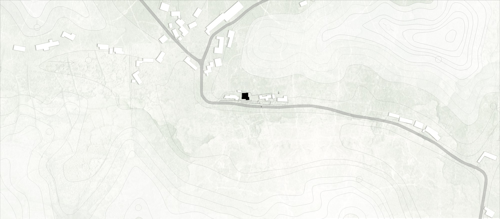

Text: Walking into the office from block C, a new made brick wall with full height is playing a contrast to the historical elements. The color choice of bricks is intent to give a warm welcome to the attendance for visitors.
Image: http://labang-img.oss-cn-shenzhen.aliyuncs.com/WNllYa3x.jpg



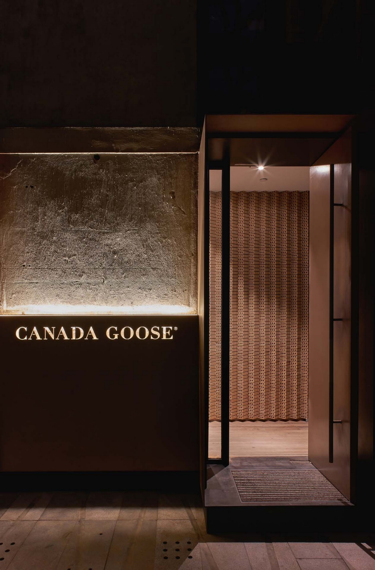

Text: The brown metal elements are used both indoor and outdoor. They connected the whole building with different functions and emphasized the contrast between old and new in term of material choices and construction solutions.
Image: http://labang-img.oss-cn-shenzhen.aliyuncs.com/mr7hxvW7.jpg



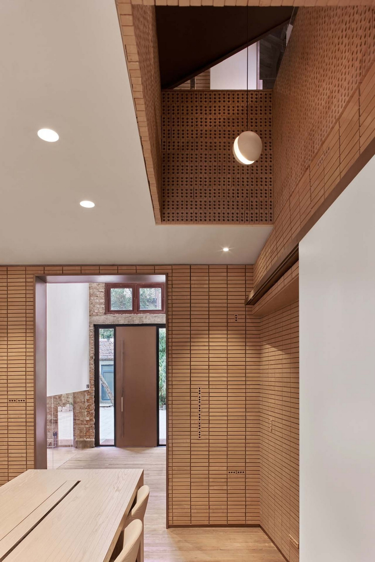

Text: Perhapsthe charm of the "Magic Cube" lies here. From the 12x12x12 modularrational structure to the square inch, the progressive space is ambiguous. Inthe flowing time, architecture and nature, architecture and people graduallymerge to produce empathy.
Image: http://labang-img.oss-cn-shenzhen.aliyuncs.com/ozASmB6M.jpg



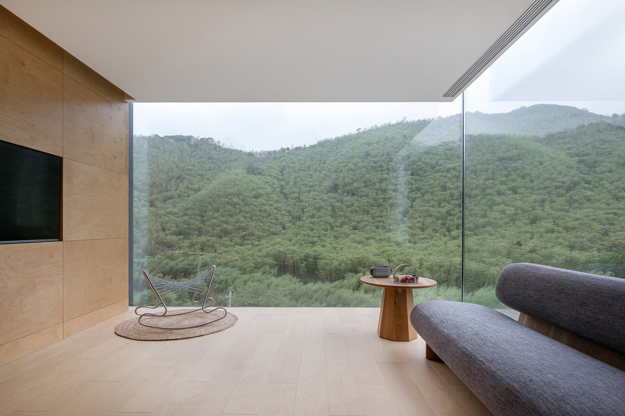

In [ ]:
from IPython.display import display
from PIL import Image
import requests
from io import BytesIO

# 假设 top_results 包含了你想要显示的图片链接
for result_text, result_img in top_results:
    print(f"Text: {result_text}\nImage: {result_img}\n")

    # 下载图片
    response = requests.get(result_img)
    img = Image.open(BytesIO(response.content))

    # 获取原始尺寸并计算新尺寸
    original_size = img.size
    new_size = (original_size[0] // 4, original_size[1] // 4)

    # 调整图片大小
    img = img.resize(new_size)

    # 显示调整后的图片
    display(img)




In [ ]:
!pip install -q diffusers transformers accelerate
!pip install -q controlnet-aux

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.4/202.4 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.3 MB/s eta 0:00:00


In [ ]:
from diffusers.pipelines import BlipDiffusionControlNetPipeline
from diffusers.utils import load_image
from controlnet_aux import CannyDetector
import torch

blip_diffusion_pipe = BlipDiffusionControlNetPipeline.from_pretrained(
    "Salesforce/blipdiffusion-controlnet", torch_dtype=torch.float16
).to("cuda")

/usr/local/lib/python3.10/dist-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_5m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_11m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.

model_index.json:   0%|          | 0.00/754 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors not found


Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

image_processor/preprocessor_config.json:   0%|          | 0.00/419 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/355 [00:00<?, ?B/s]

qformer/config.json:   0%|          | 0.00/708 [00:00<?, ?B/s]

controlnet/config.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.73k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/628 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/8 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
style_subject = "red brick"
tgt_subject = "architecture"
text_prompt = "Create a design scheme that incorporates traditional textiles, historical architecture, cultural artifacts, traditional crafts, historical events, cultural symbols, and historical references to create a rich and unique design with a strong historical and cultural imprint"

cldm_cond_image = load_image(
    "/content/figure-4-1.jpg"
).resize((512,512))


canny = CannyDetector()
cldm_cond_image = canny(cldm_cond_image, 30, 70, output_type="pil")
style_image = load_image(
    "/content/style.png"
)
guidance_scale = 7.5
num_inference_steps = 50
negative_prompt = "over-exposure, under-exposure, saturated, duplicate, out of frame, lowres, cropped, worst quality, low quality, jpeg artifacts, morbid, mutilated, out of frame, ugly, bad anatomy, bad proportions, deformed, blurry, duplicate"


output = blip_diffusion_pipe(
    text_prompt,
    style_image,
    cldm_cond_image,
    style_subject,
    tgt_subject,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    neg_prompt=negative_prompt,

).images
output[0].save("image_archi1.png")


  0%|          | 0/51 [00:00<?, ?it/s]

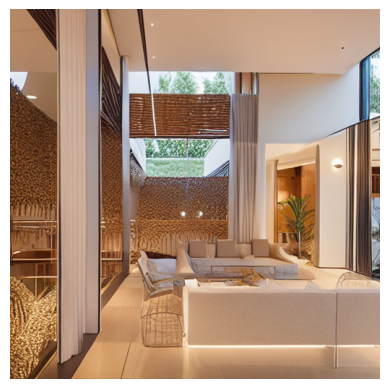

In [ ]:
from matplotlib import pyplot as plt
img = output[0]
plt.imshow(img)
plt.axis('off')  # 不显示坐标轴
plt.show()
